In [26]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

## Problem (a)

Define random matrix $A$ and vector $b$.

In [27]:
def initial(N):
    """
    Give a positive Integer N, return a random nxn matrix A, and nx1 vector b
    """
    A = np.random.rand(N,N)
    b = np.random.rand(N,1)
    return A,b

## problem b

Define a method return time to solve the linear system



In [28]:
def time(N):
    A,b = initial(N)
    start_time =timeit.default_timer()
    np.linalg.solve(A,b)
    stop_time =timeit.default_timer()
    return stop_time - start_time

## problem c

i) Find N which only has a few times

By test, When N = 10000, it takes about 6 seconds.

ii) see codes below
    Find ten values of n between N/100 and N, space equally in logarithmic scale.
    Here choose $\{100^{-1} N, 100^{-\frac{8}{9}}N,\cdots,N\}$.


iii) see the graph below

 The approximated dependency is $a(n) \approx n^{\frac{1}{10^3}}$


In [30]:
x_axis = np.zeros(10)
y_axis = np.zeros(10)

for i in range(10):
    x_axis[i] = np.floor(10000*(100**(-(9-i)/9)))
    
total_time = 0

for i in range(10):
    for j in range(5):
        total_time = total_time + time(int(x_axis[i]))
    y_axis[i] = total_time/5
    total_time = 0

print(f"a(n) is shown below: \n {y_axis}")

a(n) is shown below: 
 [4.01742900e-03 1.49778780e-03 1.97887680e-03 4.50868740e-03
 5.40630748e-02 4.62963642e-02 1.01326010e-01 1.18388545e+00
 2.18704760e+00 1.55858871e+01]


Text(0, 0.5, 'a(n)')

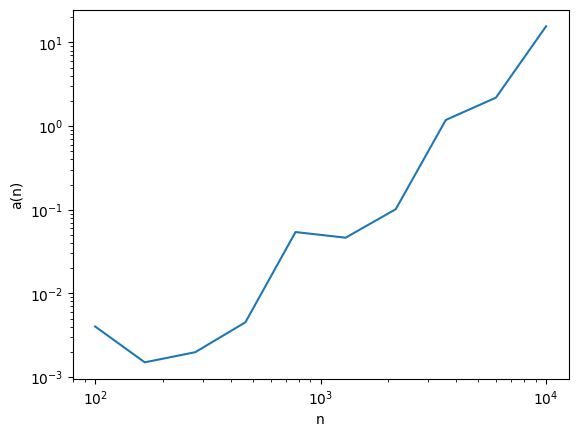

In [31]:
plt.loglog(x_axis,y_axis)
plt.xlabel("n")
plt.ylabel("a(n)")

## problem d

i)Define a method to return time to solve eigenvalues of matrix

Here choose N = 1000, average time is 3 seconds.

ii) see codes below


iii) see the graph below

 The approximated dependency is $a(n) \approx n^{\frac{1}{10^2}}$



In [32]:
def time_eigenvalue(N):
    A,b = initial(N)
    start_time =timeit.default_timer()
    np.linalg.eig(A)
    stop_time =timeit.default_timer()
    return stop_time - start_time

x_axis_eig = np.zeros(10)
y_axis_eig = np.zeros(10)

for i in range(10):
    x_axis_eig[i] = np.floor(1000*(100**(-(9-i)/9)))
    
total_time = 0

for i in range(10):
    for j in range(5):
        total_time = total_time + time_eigenvalue(int(x_axis_eig[i]))
    y_axis_eig[i] = total_time/5
    total_time = 0

print(f"b(n) is shown below: \n {y_axis_eig}")

b(n) is shown below: 
 [8.90125600e-04 3.54387200e-04 4.44705600e-04 1.55937220e-03
 7.41569176e-02 8.78167737e-01 1.85172393e+00 4.05971178e+00
 7.89566000e+00 1.89424478e+01]


Text(0, 0.5, 'b(n) for eigenvalue')

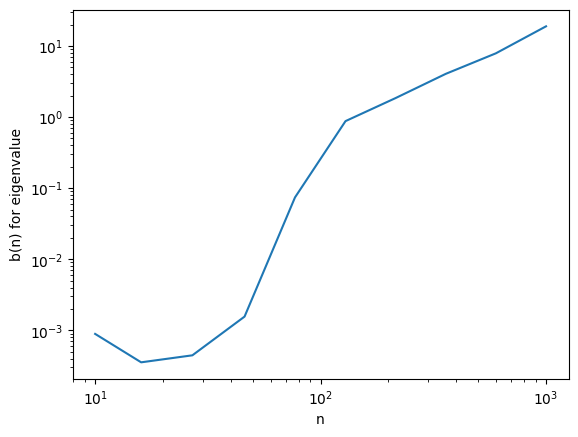

In [33]:
plt.loglog(x_axis_eig,y_axis_eig)
plt.xlabel("n")
plt.ylabel("b(n) for eigenvalue")

## Problem (e)

Draw a(n) and b(n) on the same graph, and we can get that calculating eigevalues takes significant more time than solving linear equations.
I am not surprised with this result because the common time complexity of solve linear equations is about $O(n^{2.4})$, but getting eigenvalues always involves with SVD, which takes at least $O(n^3)$ complexity.

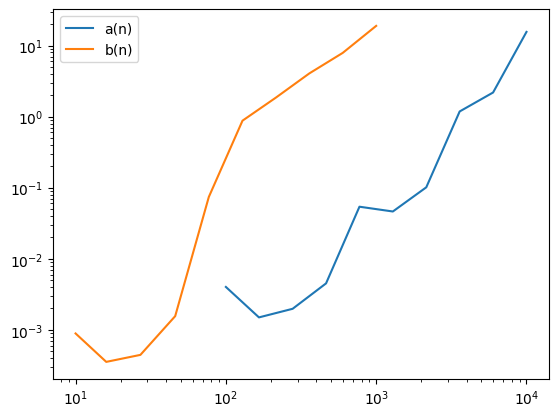

In [34]:
plt.loglog(x_axis,y_axis,label='a(n)')
plt.loglog(x_axis_eig,y_axis_eig,label='b(n)')
plt.legend()